In [2]:
import pandas as pd
from sshtunnel import SSHTunnelForwarder
from pymongo import MongoClient
from pymongo.errors import OperationFailure
from load_data_utils import *
from pprint import pprint
def cutting_records(cashflows,date1,date2):
    copy = cashflows.copy()
    for record in cashflows:
            if(record['report_date']<date1 or record['report_date']>date2):
                copy.remove(record)
    return copy

In [3]:
profile = pd.read_csv('./Purchase Redemption Data/user_profile_table.csv')
profile.head(3)

,user_id,sex,city,constellation
0,2,1,Shanghai,Leo
1,12,1,Guangzhou,Capricorn
2,22,1,Shanghai,Gemini


In [4]:
cash_flow = pd.read_csv('./Purchase Redemption Data/user_balance_table.csv')
cash_flow.head(3)

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


In [5]:
server = SSHTunnelForwarder(
    "34.67.124.229",
    ssh_username="apple",
    ssh_pkey="/Users/apple/Desktop/CSSE433/project-cli-keys/key-instance-1",
    ssh_private_key_password="csse433",
    remote_bind_address=("127.0.0.1", 27017)
)
server.start()
host = "localhost"
port = server.local_bind_port
try:
    cli = MongoClient(f'mongodb://{host}:{port}/?authSource=admin')
    cli.server_info()
except OperationFailure as err:
    print(err)

In [6]:
db = cli['yuebao']
customers = db['customer']

In [7]:
user_ids = [1,2,3]
docs = [generate_customer_dict(user_id, profile, cash_flow) for user_id in user_ids]

In [8]:
docs[1]

{'user_id': 2,
 'sex': 1,
 'city': 'Shanghai',
 'constellation': 'Leo',
 'cashflows': [{'report_date': 20140217,
   'balance': {'tBalance': 0, 'yBalance': 0},
   'purchase': {'purchase_bal_amt': 0, 'purchase_bank_amt': 0, 'revenue': 0},
   'redemption': {'consumption': {'category1': -1,
     'category2': -1,
     'category3': -1,
     'category4': -1},
    'transfer': {'tftobal_amt': 0, 'tftocard_amt': 0}}}]}

In [10]:
out = customers.find_one({'user_id': 1}, 
                   {'user_id': 1, 'cashflows':1, 'sex':1, 'city':1, 'constellation':1, '_id':0})

In [13]:
cash = out['cashflows']
cash

[{'report_date': 20140805,
  'balance': {'tBalance': 20385, 'yBalance': 20383},
  'purchase': {'purchase_bal_amt': 0, 'purchase_bank_amt': 0, 'revenue': 2},
  'redemption': {'consumption': {'category1': -1,
    'category2': -1,
    'category3': -1,
    'category4': -1},
   'transfer': {'tftobal_amt': 0, 'tftocard_amt': 0}}},
 {'report_date': 20140808,
  'balance': {'tBalance': 20391, 'yBalance': 20389},
  'purchase': {'purchase_bal_amt': 0, 'purchase_bank_amt': 0, 'revenue': 2},
  'redemption': {'consumption': {'category1': -1,
    'category2': -1,
    'category3': -1,
    'category4': -1},
   'transfer': {'tftobal_amt': 0, 'tftocard_amt': 0}}},
 {'report_date': 20140811,
  'balance': {'tBalance': 20397, 'yBalance': 20395},
  'purchase': {'purchase_bal_amt': 0, 'purchase_bank_amt': 0, 'revenue': 2},
  'redemption': {'consumption': {'category1': -1,
    'category2': -1,
    'category3': -1,
    'category4': -1},
   'transfer': {'tftobal_amt': 0, 'tftocard_amt': 0}}},
 {'report_date': 20

In [16]:
import base64
from io import BytesIO
from matplotlib.figure import Figure

In [17]:
plot_df = pd.DataFrame()
balance = [cash['balance']['tBalance'] for cash in cutting_records(cash, 20140601, 20140805)]
plot_df['balance'] = balance
plot = Figure()
ax = plot.subplots()
plot_df.plot(ax=ax)

<AxesSubplot:>

In [19]:
buf = BytesIO()
plot.savefig(buf, format='png')
data = base64.b64encode(buf.getbuffer()).decode('ascii')

"img src=''/>"
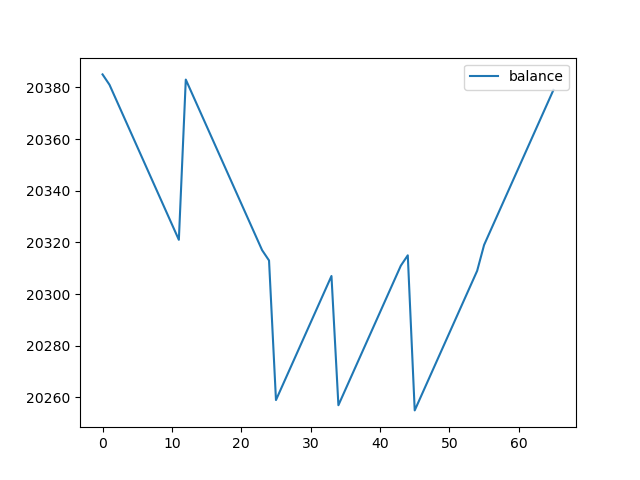

In [20]:
f"img src='data:image/png;base64,{data}'/>"